In [81]:
# 소스코드 출처: https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline

import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd

데이터 = pd.read_csv("german_data_credit_selected.csv", index_col=0)
데이터.describe()

,Checking Account,Savings Account,Sex,Property,Duration,Credit Amount,Age,Loan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.001000,1.190000,0.690000,1.742000,20.903000,3271.258000,35.546000,0.700000
std,0.957034,0.966869,0.462725,1.079167,12.058814,2822.736876,11.375469,0.458487
min,0.000000,0.000000,0.000000,0.000000,4.000000,250.000000,19.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,12.000000,1365.500000,27.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,18.000000,2319.500000,33.000000,1.000000
75%,2.000000,1.000000,1.000000,3.000000,24.000000,3972.250000,42.000000,1.000000
max,3.000000,4.000000,1.000000,3.000000,72.000000,18424.000000,75.000000,1.000000


In [82]:
Checking_Account_map ={0 : "no checking account",
                       1 : "<0 DM", 
                       2 : "0 <= <200 DM",
                       3 : ">= 200 DM "}

Saving_Account_map ={0: "no savings account",
                     1 : "<100 DM",
                     2 : "100 <= <500 DM",
                     3 : "500 <= < 1000 DM", 
                     4 : ">= 1000 DM"}

Sex_map = {0 : "female", 1 : "male"}

Property_map ={0: "unknown / no property",
          1 : "real estate", 
          2 : "savings agreement/life insurance", 
          3 : "car or other"}

print(데이터.describe())
print(데이터.head())

       Checking Account  Savings Account          Sex     Property  \
count       1000.000000      1000.000000  1000.000000  1000.000000   
mean           1.001000         1.190000     0.690000     1.742000   
std            0.957034         0.966869     0.462725     1.079167   
min            0.000000         0.000000     0.000000     0.000000   
25%            0.000000         1.000000     0.000000     1.000000   
50%            1.000000         1.000000     1.000000     2.000000   
75%            2.000000         1.000000     1.000000     3.000000   
max            3.000000         4.000000     1.000000     3.000000   

          Duration  Credit Amount          Age         Loan  
count  1000.000000    1000.000000  1000.000000  1000.000000  
mean     20.903000    3271.258000    35.546000     0.700000  
std      12.058814    2822.736876    11.375469     0.458487  
min       4.000000     250.000000    19.000000     0.000000  
25%      12.000000    1365.500000    27.000000     0.000000

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = 데이터['Loan']
X = 데이터.drop(columns=['Loan'])
X = pd.get_dummies(X, columns=['Checking Account', 'Savings Account', 'Property'])
X['Credit Amount'] = np.log(X['Credit Amount'])
# 참고 - normalize 할 경우 성능이 개선될 수 있으나, 아래 설명 함수 적용이 번거로우므로, normalize를 하지 않았음
# X[['Duration', 'Credit Amount', 'Age']] = StandardScaler().fit_transform(X[['Duration', 'Credit Amount', 'Age']])
print(X.head())

X_학습, X_테스트, y_학습, y_테스트 = train_test_split(X, y, test_size=0.25, random_state=0)

   Sex  Duration  Credit Amount  Age  Checking Account_0  Checking Account_1  \
0    1         6       7.063904   67                   0                   1   
1    0        48       8.691315   22                   0                   0   
2    1        12       7.647786   49                   1                   0   
3    1        42       8.972337   45                   0                   1   
4    1        24       8.490849   53                   0                   1   

   Checking Account_2  Checking Account_3  Savings Account_0  \
0                   0                   0                  1   
1                   1                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   Savings Account_1  Savings Account_2  Savings Account_3  Savings Account_4  \
0                  0                  0              

In [84]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
모델 = LogisticRegression(penalty = 'l2', C=10, random_state=0)
모델.fit(X_학습, y_학습)
모델.score(X_학습, y_학습)

0.748

In [85]:
from sklearn import metrics

점수 = 모델.score(X_테스트, y_테스트)
print(점수)
예측 = 모델.predict(X_테스트)
cm = metrics.confusion_matrix(y_테스트, 예측)
print(cm)

0.72
[[ 31  43]
 [ 27 149]]


In [86]:
for 컬럼, 계수 in zip(X.columns, 모델.coef_[0]):
    print(f"{컬럼}\t{계수}")

Sex	0.25153248029030784
Duration	-0.03970142413636183
Credit Amount	0.1925227370682775
Age	0.013339324266279717
Checking Account_0	0.8736332153328291
Checking Account_1	-0.9580364276334322
Checking Account_2	-0.4787600194143849
Checking Account_3	0.46775867379991537
Savings Account_0	0.48615721816784574
Savings Account_1	-0.3663897218988836
Savings Account_2	-0.36776594413524394
Savings Account_3	-0.1255254281968533
Savings Account_4	0.27811931814800533
Property_0	-0.46347565782970596
Property_1	0.6187457541381525
Property_2	-0.10283401530171062
Property_3	-0.14784063892183238


In [87]:
# 여러 ML 모델 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report

모델_리스트 = []
모델_리스트.append(('LR', LogisticRegression(C=10)))
모델_리스트.append(('LDA', LinearDiscriminantAnalysis()))
모델_리스트.append(('KNN', KNeighborsClassifier()))
모델_리스트.append(('CART', DecisionTreeClassifier()))
모델_리스트.append(('NB', GaussianNB()))
모델_리스트.append(('RF', RandomForestClassifier()))
모델_리스트.append(('SVM', SVC(gamma='auto')))
모델_리스트.append(('XGB', XGBClassifier(verbosity=0)))

교차검증_결과_리스트 = []
테스트셋_결과_리스트 = []
모델명_리스트 = []
평가방법 = 'accuracy'

for 모델명, 모델 in 모델_리스트:
    k폴드_교차검증 = KFold(n_splits=10)
    교차검증_결과 = cross_val_score(모델, X, y, cv=k폴드_교차검증, scoring=평가방법)
    교차검증_결과_리스트.append(교차검증_결과)
    모델명_리스트.append(모델명)
    print(f"{모델명}: {평가방법} Avg: {교차검증_결과.mean():.2} Std {교차검증_결과.std():.2}")
    모델.fit(X_학습, y_학습)
    예측 = 모델.predict(X_테스트)
    print(f"Test Dataset : {classification_report(y_테스트, 예측)}")
    테스트셋_결과 = classification_report(y_테스트, 예측, output_dict=True)
    테스트셋_결과_리스트.append({'model': 모델명,'type' : 'accuracy', 'value' : 테스트셋_결과['accuracy']})
    테스트셋_결과_리스트.append({'model': 모델명,'type' : 'precision', 'value' : 테스트셋_결과['1']['precision']})
    테스트셋_결과_리스트.append({'model': 모델명,'type' : 'recall', 'value' : 테스트셋_결과['1']['recall']})
    테스트셋_결과_리스트.append({'model': 모델명,'type' : 'f1-score', 'value' : 테스트셋_결과['1']['f1-score']})



LR: accuracy Avg: 0.73 Std 0.041
Test Dataset :               precision    recall  f1-score   support

           0       0.53      0.42      0.47        74
           1       0.78      0.85      0.81       176

    accuracy                           0.72       250
   macro avg       0.66      0.63      0.64       250
weighted avg       0.70      0.72      0.71       250

LDA: accuracy Avg: 0.74 Std 0.044
Test Dataset :               precision    recall  f1-score   support

           0       0.52      0.43      0.47        74
           1       0.78      0.83      0.80       176

    accuracy                           0.71       250
   macro avg       0.65      0.63      0.64       250
weighted avg       0.70      0.71      0.70       250

KNN: accuracy Avg: 0.68 Std 0.038
Test Dataset :               precision    recall  f1-score   support

           0       0.45      0.34      0.38        74
           1       0.75      0.82      0.78       176

    accuracy                        

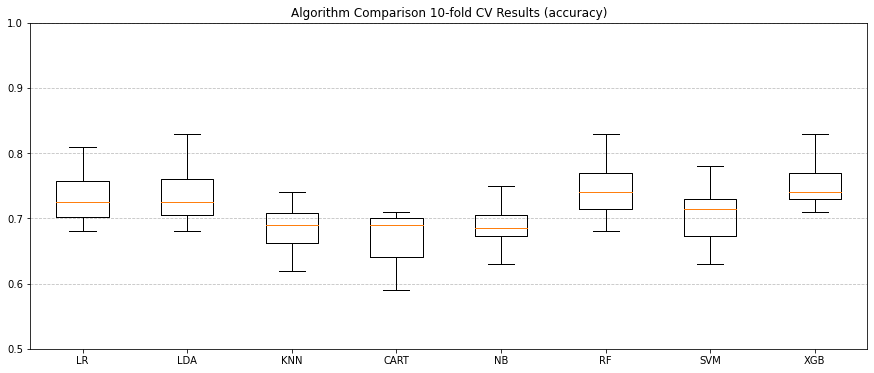

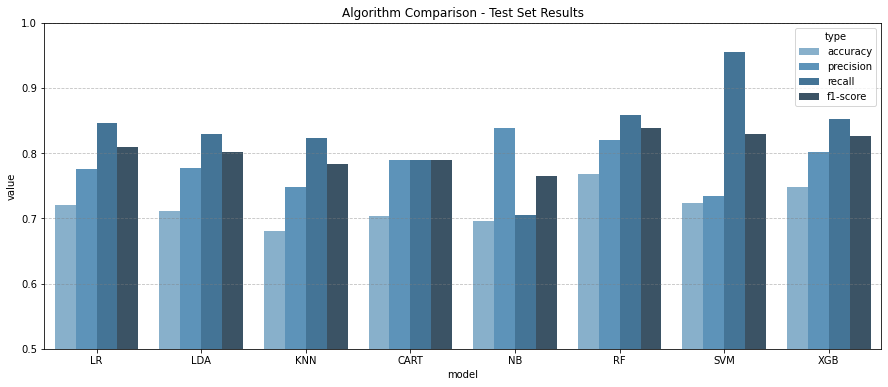

In [88]:
# algorithm comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.title(f"Algorithm Comparison 10-fold CV Results ({평가방법})")
plt.ylim(.50, 1)
plt.boxplot(교차검증_결과_리스트, labels=모델명_리스트)
plt.show()

plt.figure(figsize=(15,6))
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.title(f"Algorithm Comparison - Test Set Results")
sns.barplot(data=pd.DataFrame(테스트셋_결과_리스트), 
            x='model', y='value', hue='type',  palette="Blues_d")
plt.ylim(.50, 1)

plt.show()


In [89]:
# XGBoost 파라미터 최적화

from sklearn.model_selection import GridSearchCV

파라미터 = {'max_depth' : np.arange(2, 6, 1),
            'learning_rate' : np.arange(0.05, 0.6, 0.05),
            'n_estimators' : np.arange(10, 300, 50)}

clf = GridSearchCV(XGBClassifier(), 
                  파라미터,
                  scoring='accuracy',
                  cv = 5,
                  n_jobs = 16)

clf.fit(X_학습, y_학습)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [90]:
clf.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 10}

In [91]:
모델 = XGBClassifier(learning_rate = 0.5, max_depth =  3, n_estimators = 10)
모델.fit(X_학습, y_학습)
예측 = 모델.predict(X_테스트)
모델.score(X_테스트, y_테스트)

0.768

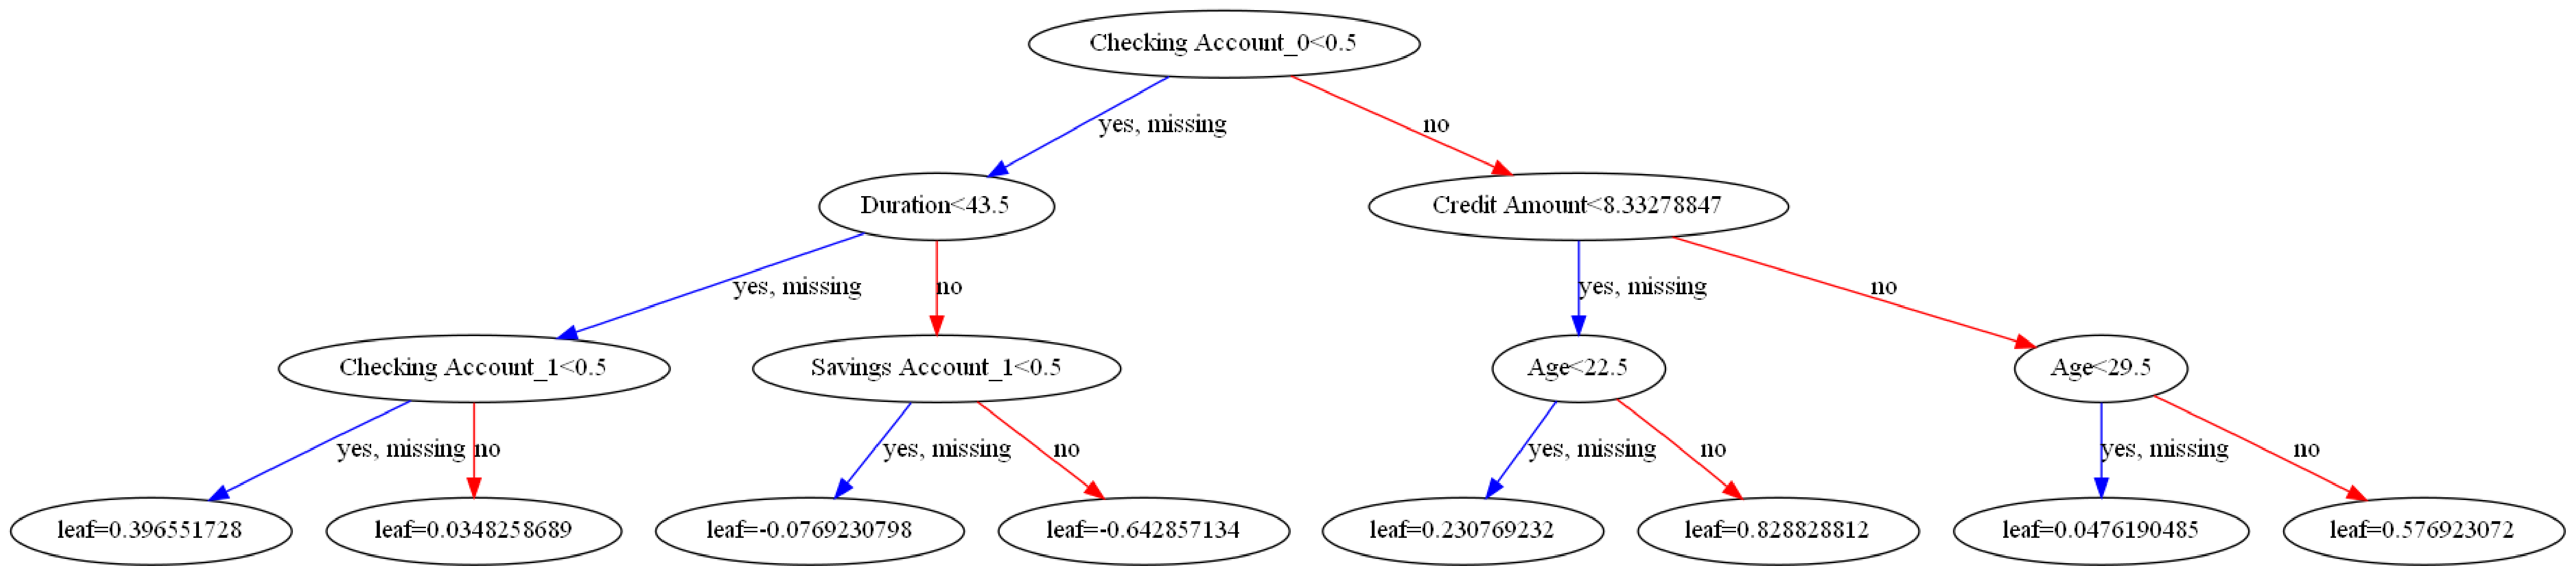

In [92]:
# XGBoost Decision Tree 시각화
# 소스코드 출처: XAI 설명가능한 인공지능, 인공지능을 해부하다 53-59면
# Graphviz 설치 : https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224

import os
os.environ['path'] += (os.pathsep + "C:/Program Files/Graphviz 2.44.1/bin")
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 100, 200

plot_tree(모델)
plt.show()

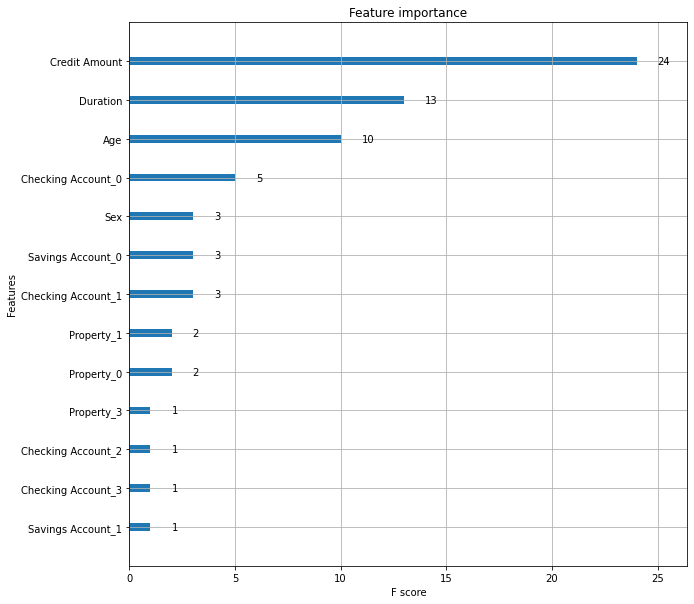

In [93]:
# XGBoost Feature Importance

# 소스코드 출처: XAI 설명가능한 인공지능, 인공지능을 해부하다 59-62면

from xgboost import plot_importance
rcParams['figure.figsize'] = 10, 10

plot_importance(모델)
plt.show()

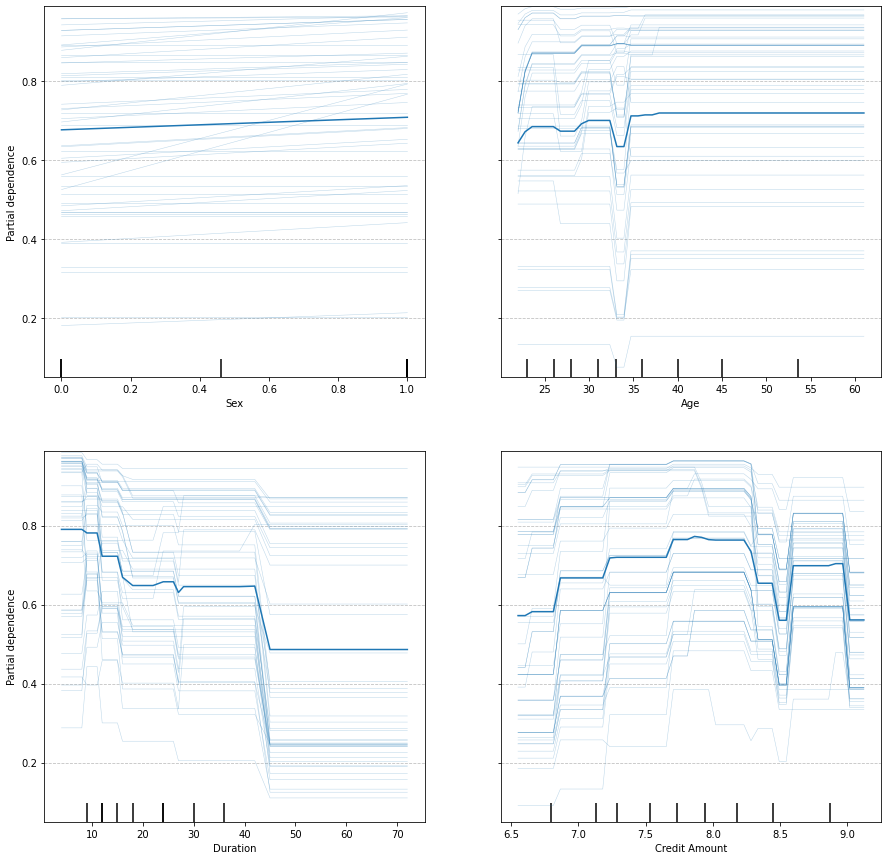

In [94]:
# PDD, ICE plot
# 소스코드 출처: https://scikit-learn.org/stable/modules/partial_dependence.html
# 참고 - sklearn 0.24 버전 필요

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

# 나이
fig = plt.figure(figsize=(15,15))
axs = fig.subplots(nrows=2, ncols=2)
plot_partial_dependence(모델, X_학습, ['Sex', 'Age', 'Duration', 'Credit Amount'], kind='both', 
                        subsample=50,
                        grid_resolution=50, ax=axs)
for ax in axs.flat:
    ax.legend_ = None
    ax.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.show()


PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


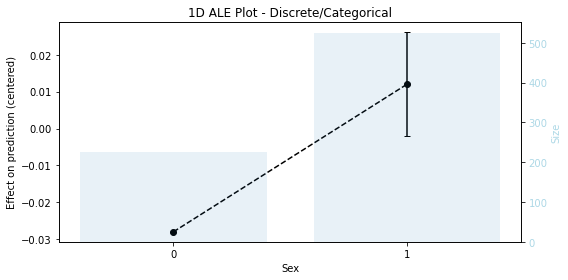

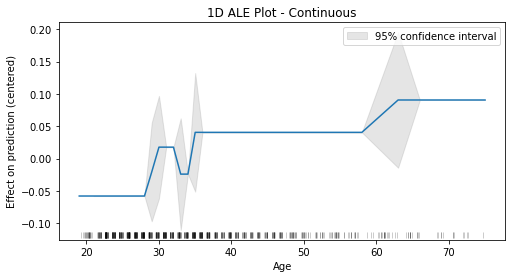

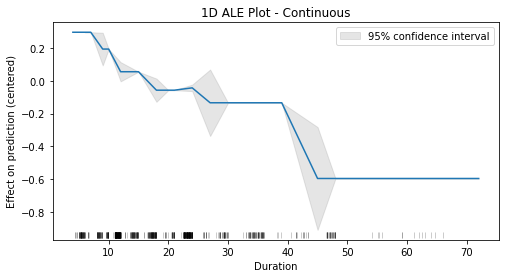

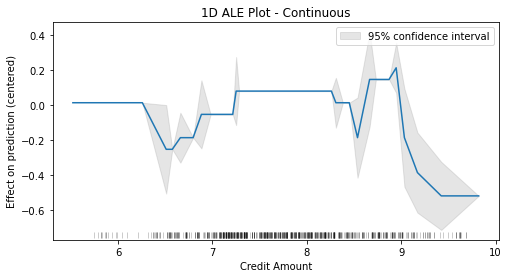

In [95]:
# ALE
# 소스출처: https://github.com/DanaJomar/PyALE

from PyALE import ale

for 특성 in ['Sex', 'Age', 'Duration', 'Credit Amount']:
    ale(X=X_학습, model=모델, feature=[특성], grid_size=50, include_CI=True)   

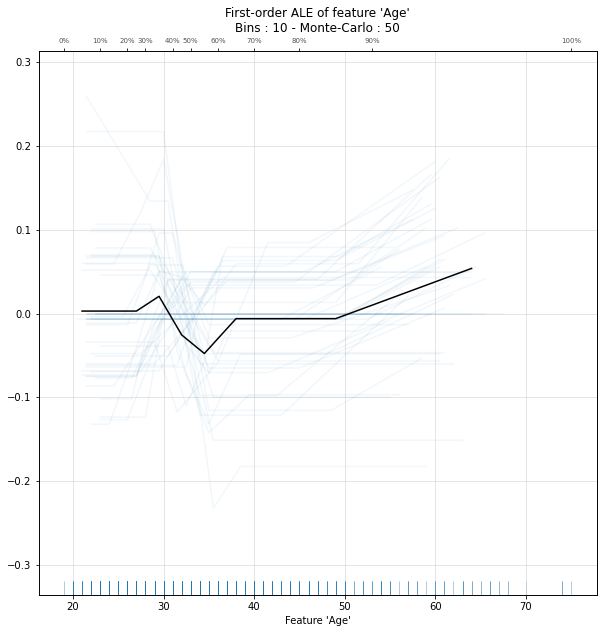

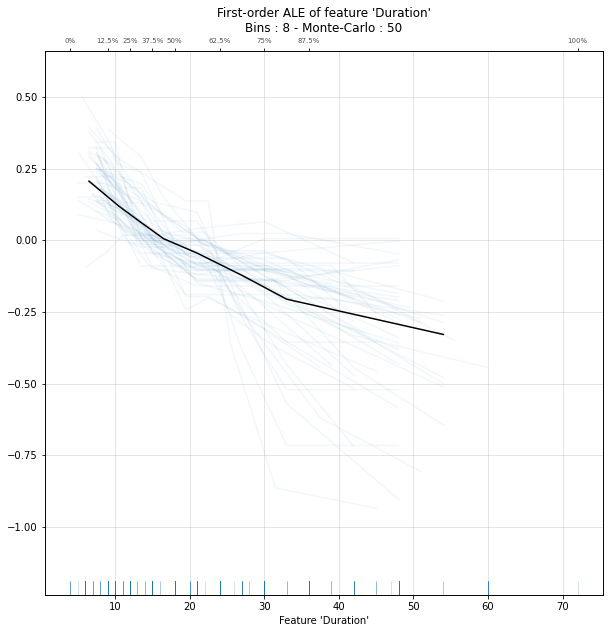

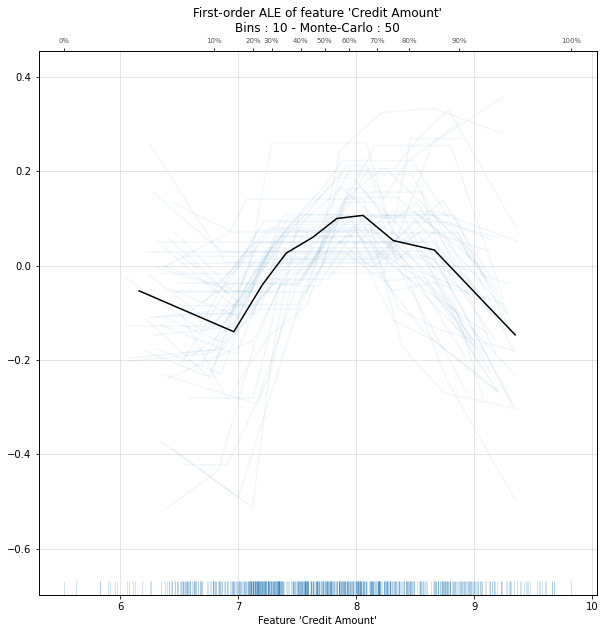

In [96]:
# ALE (alepython)
# 소스출처: https://github.com/blent-ai/ALEPython

from alepython import ale_plot

for 특성 in ['Age', 'Duration', 'Credit Amount']:
    ale_plot(모델, X_학습, 특성, monte_carlo=True)

In [97]:
# LIME
import lime
import lime.lime_tabular

LIME_설명기 = lime.lime_tabular.LimeTabularExplainer(np.array(X_학습), 
    feature_names=list(X_학습.columns),
    class_names=['No Loan', 'Loan'],
    mode='classification')    

설명대상_인덱스 = 0
설명대상 = X_학습.iloc[설명대상_인덱스]
print(설명대상)
print(모델.predict_proba(X_학습)[설명대상_인덱스])

# 설명
설명 = LIME_설명기.explain_instance(설명대상, 모델.predict_proba)
설명.show_in_notebook(show_table=True, show_all=False)


Sex                    1.000000
Duration              24.000000
Credit Amount          8.331105
Age                   35.000000
Checking Account_0     1.000000
Checking Account_1     0.000000
Checking Account_2     0.000000
Checking Account_3     0.000000
Savings Account_0      0.000000
Savings Account_1      0.000000
Savings Account_2      1.000000
Savings Account_3      0.000000
Savings Account_4      0.000000
Property_0             0.000000
Property_1             0.000000
Property_2             1.000000
Property_3             0.000000
Name: 253, dtype: float64
[0.20153564 0.79846436]


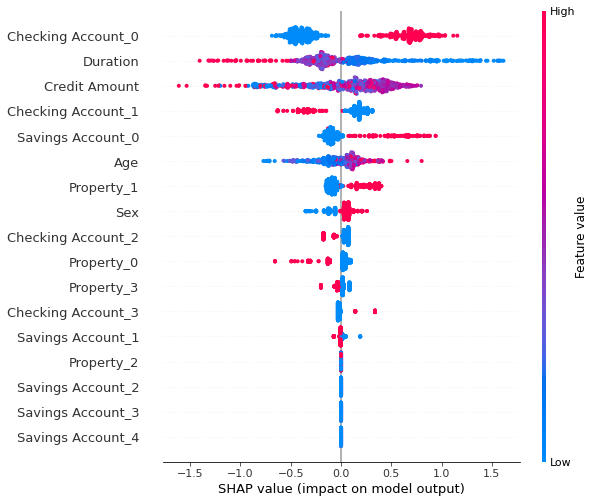

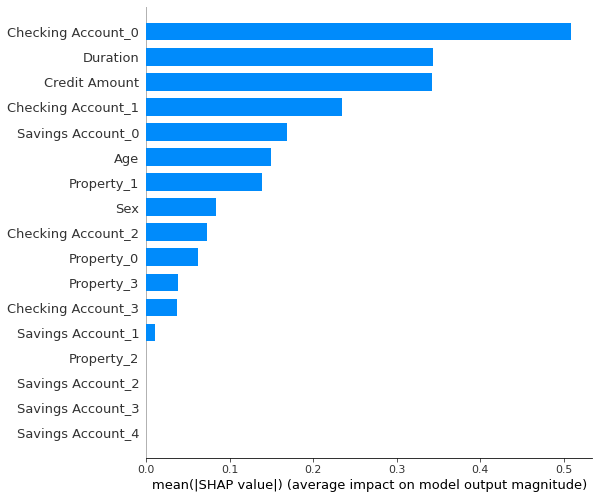

In [98]:
# SHAP
# 소스코드 출처: XAI 설명가능한 인공지능, 인공지능을 해부하다 253-259면
# https://datanetworkanalysis.github.io/2019/12/24/shap3 참조

import shap

shap.initjs()

SHAP_설명기 = shap.TreeExplainer(모델)
샤플리_값 = SHAP_설명기.shap_values(X_학습)

# 전체 모델에 대한 설명 - Summary Plot
shap.summary_plot(샤플리_값, X_학습)
shap.summary_plot(샤플리_값, X_학습, plot_type='bar')

In [99]:
# 전체 모델에 대한 설명 - Interactive Interface
shap.force_plot(SHAP_설명기.expected_value, 샤플리_값,X_학습)

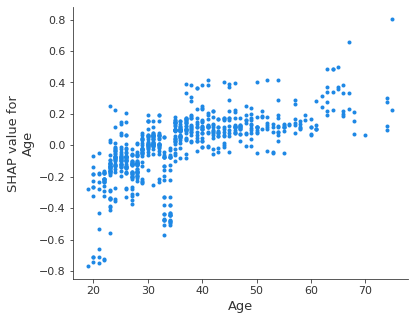

In [100]:
# 전체 모델에 대한 설명 - Dependence Plot

shap.dependence_plot('Age', 샤플리_값, X_학습, interaction_index=None)

In [101]:
# 개별 사례에 대한 설명
설명대상_인덱스 = 0
설명대상 = X_학습.iloc[설명대상_인덱스]
print(설명대상)
print(모델.predict_proba(X_학습)[설명대상_인덱스])

shap.force_plot(SHAP_설명기.expected_value, 
                샤플리_값[설명대상_인덱스, :],
                X_학습.iloc[설명대상_인덱스, :])

Sex                    1.000000
Duration              24.000000
Credit Amount          8.331105
Age                   35.000000
Checking Account_0     1.000000
Checking Account_1     0.000000
Checking Account_2     0.000000
Checking Account_3     0.000000
Savings Account_0      0.000000
Savings Account_1      0.000000
Savings Account_2      1.000000
Savings Account_3      0.000000
Savings Account_4      0.000000
Property_0             0.000000
Property_1             0.000000
Property_2             1.000000
Property_3             0.000000
Name: 253, dtype: float64
[0.20153564 0.79846436]
